## Observations and Insights 

In [43]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combinded_data_df = pd.merge(mouse_metadata, study_results, how = 'outer', on = 'Mouse ID')

# Display the data table for preview

combinded_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [44]:
# Checking the number of mice.

Mice_by_ID = combinded_data_df["Mouse ID"].value_counts()

Mice_Count = len(Mice_by_ID)
Mice_Count

249

In [45]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mice_dups = combinded_data_df.loc[combinded_data_df.duplicated(['Mouse ID','Timepoint',]),'Mouse ID'].unique()


In [46]:
# Optional: Get all the data for the duplicate mouse ID. 

all_mice_dups = pd.DataFrame(mice_dups)
all_mice_dups

,0
0,g989


In [47]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

combinded_no_dups = combinded_data_df[combinded_data_df["Mouse ID"].isin(all_mice_dups) == False]

In [7]:
# Checking the number of mice in the clean DataFrame.

mice_no_dups = combinded_no_dups["Mouse ID"].value_counts()
mice_number_clean = len(mice_no_dups)
mice_number_clean

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

tumor_mean_by_reg = combinded_no_dups.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
tumor_median_by_reg = combinded_no_dups.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
tumor_var_by_reg = combinded_no_dups.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
tumor_std_by_reg = combinded_no_dups.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
tumor_SEM_by_reg = combinded_no_dups.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summ_stats = pd.DataFrame({"Mean": tumor_mean_by_reg,
                          "Median":tumor_median_by_reg,
                          "Variance":tumor_var_by_reg,
                          "Standard Dev":tumor_std_by_reg,
                          "SEM": tumor_SEM_by_reg})
summ_stats

,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summ_table_agg = combinded_no_dups.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']

summ_table_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


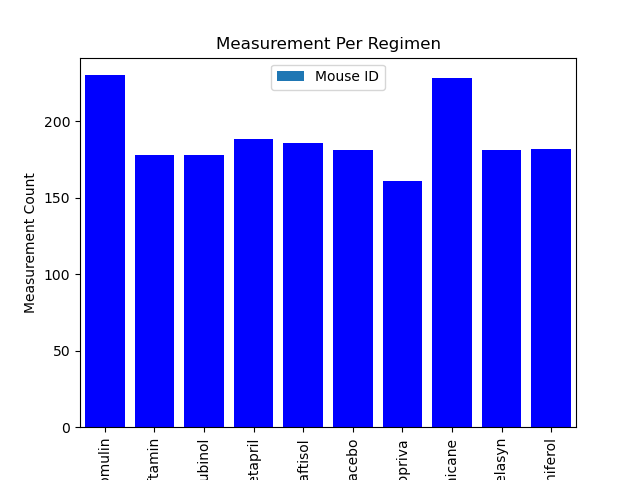

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_count_df = pd.DataFrame(combinded_no_dups.groupby('Drug Regimen').count()['Mouse ID'])

regimen_count_df.sort_values(by='Mouse ID')

regimen_count_bar = regimen_count_df.plot.bar(legend = 'best',rot = 45)
plt.ylabel("Measurement Count")
plt.title("Measurement Per Regimen")
plt.show()

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_list = regimen_count_df.index.values.tolist()

x_axis = np.arange(len(regimen_count_df))
y_axis = regimen_count_df['Mouse ID']

tick_locations = [x for x in x_axis]

plt.bar(x_axis, y_axis, color = 'b', align = 'center')
plt.xticks(tick_locations, drug_list, rotation = 'vertical')

plt.title("Measurement Per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurement Count")


Text(38.097222222222214, 0.5, 'Measurement Count')

<IPython.core.display.Javascript object>


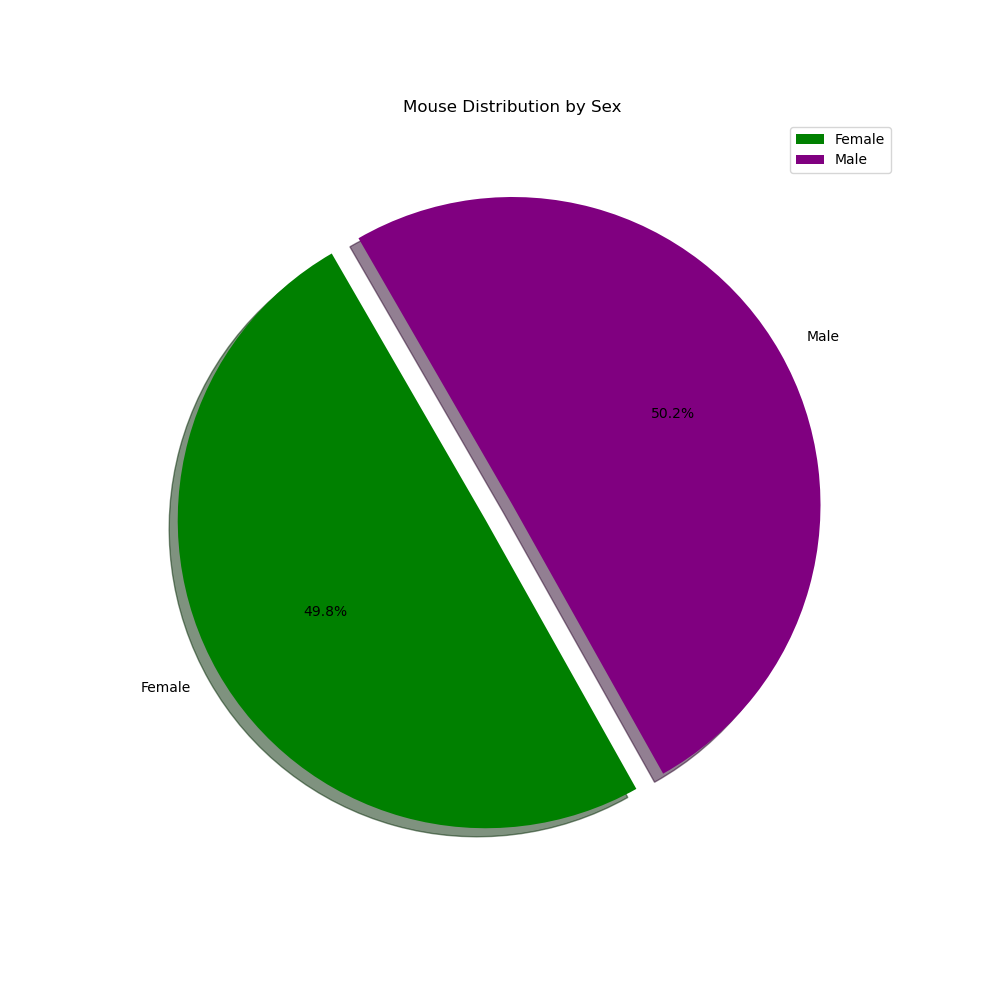

Text(0, 0.5, '')

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Group by gender to get counts
gender_groups = combinded_no_dups.groupby(["Mouse ID","Sex"])

gender_groups_df = pd.DataFrame(gender_groups.size())

#create DataFrame to be plotted
gender = pd.DataFrame(gender_groups_df.groupby(['Sex']).count())
gender.columns = ['Total Mouse Count']

gender["Mouse Sex by Percent"] = gender["Mouse Sex by Percent"] = ((gender["Total Mouse Count"]/gender["Total Mouse Count"].sum())*100)

#create plot in pandas
colors = ("Green", "Purple")
explode = (.1,0)
gender_plot = gender.plot.pie(y ='Total Mouse Count',figsize = (10,10), colors = colors, startangle = 120, explode = explode, shadow = True, autopct= "%1.1f%%")

plt.title("Mouse Distribution by Sex")
plt.ylabel('')


In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#set value for pie chart
labels = gender.index.values.tolist()
size = gender["Mouse Sex by Percent"].tolist()
colors = ["Green", "Purple"]
explode = (0.1,0)

plt.pie(size, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Mouse Distribution by Sex')


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Mouse Distribution by Sex')

## Quartiles, Outliers and Boxplots

In [52]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = combinded_no_dups.groupby(['Drug Regimen','Mouse ID']).max('Timepoint')
last_timepoints['Tumor Volume (mm3)']

last_timepoints_all_reg = pd.DataFrame(last_timepoints['Tumor Volume (mm3)'])

last_timepoints_all_reg

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               45.651331
             b742               45.000000
             f966               45.000000
             g288               46.304003
             g316               46.809225
...                                   ...
Zoniferol    q633               70.827796
             s337               62.109651
             w140               47.717952
             w575               68.401286
             x613               48.077646

[249 rows x 1 columns]

In [53]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = "Capomulin", "Ramicane", "Infubinol", "Ceftamin"
# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds


    

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

<IPython.core.display.Javascript object>


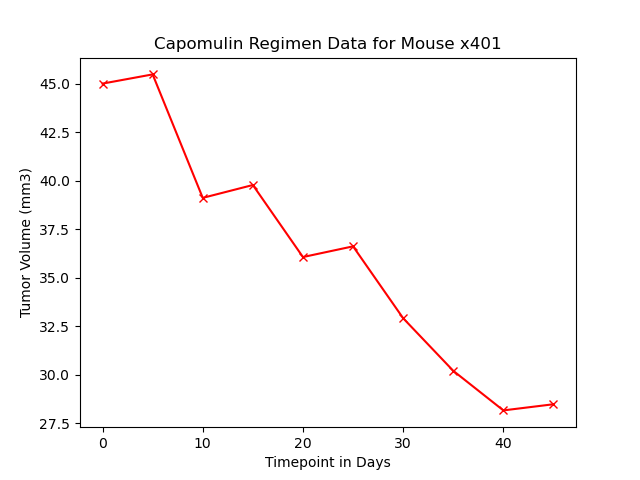

Text(0.5, 1.0, 'Capomulin Regimen Data for Mouse x401')

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_regimen_df = combinded_no_dups.loc[combinded_no_dups["Drug Regimen"]== "Capomulin"]

capomulin_mouse_df = capomulin_regimen_df.loc[capomulin_regimen_df["Mouse ID"]=="x401"]

x_axis = capomulin_mouse_df["Timepoint"]
cap_tumor_volume = capomulin_mouse_df["Tumor Volume (mm3)"]

plt.plot(x_axis,cap_tumor_volume, marker = "x", color = "red")
plt.xlabel("Timepoint in Days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Regimen Data for Mouse x401")

<IPython.core.display.Javascript object>


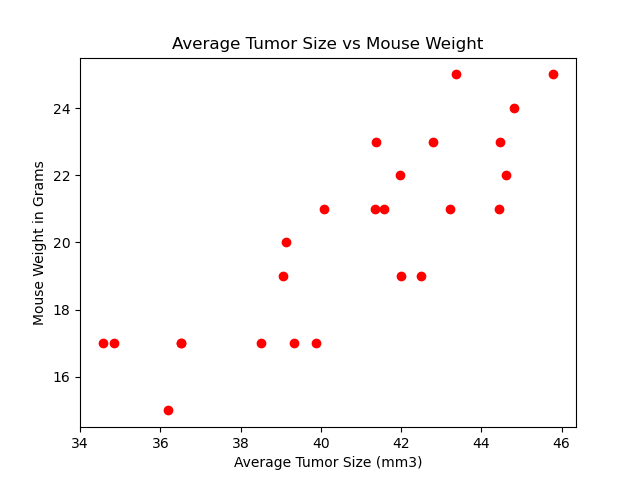

Text(0.5, 1.0, 'Average Tumor Size vs Mouse Weight')

In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg_df = capomulin_regimen_df.groupby(["Mouse ID"]).mean()

plt.scatter(capomulin_avg_df["Tumor Volume (mm3)"],capomulin_avg_df["Weight (g)"], color = "red" )
plt.xlabel("Average Tumor Size (mm3)")
plt.ylabel("Mouse Weight in Grams")
plt.title("Average Tumor Size vs Mouse Weight")

## Correlation and Regression

In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(capomulin_avg_df["Weight (g)"],capomulin_avg_df["Tumor Volume (mm3)"])[0],2)
print(f"the correlation between mouse weight and average tumor volume for the Capomulin regimen {correlation}")

the correlation between mouse weight and average tumor volume for the Capomulin regimen 0.84


<IPython.core.display.Javascript object>


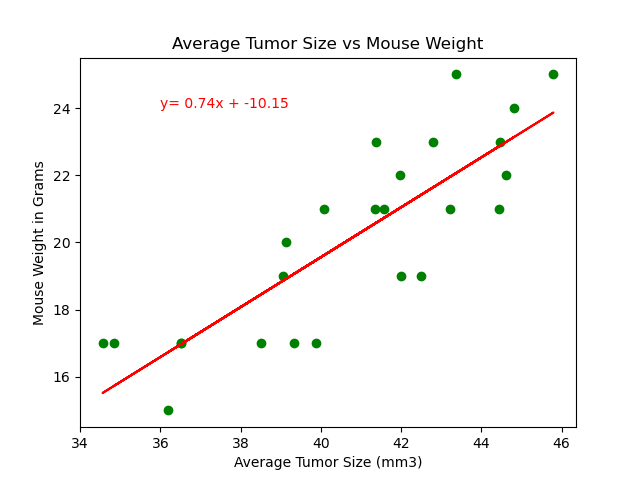

Text(0.5, 1.0, 'Average Tumor Size vs Mouse Weight')

In [64]:
#create the linear regression equation
x_values = capomulin_avg_df["Tumor Volume (mm3)"]
y_values = capomulin_avg_df["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create plot
plt.scatter(x_values,y_values, color = "green" )
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(36,24), color = "red")
plt.xlabel("Average Tumor Size (mm3)")
plt.ylabel("Mouse Weight in Grams")
plt.title("Average Tumor Size vs Mouse Weight")